In [ ]:
!pip install -q lucid>=0.2.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
xarray-einstats 0.4.0 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
tifffile 2022.10.10 requires numpy>=1.19.2, but you have numpy 1.19.0 which is incompatible.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
jax 0.3.25 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.19.0 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.


In [ ]:
import numpy as np

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [ ]:
############################################## Midpoint Line Algorithm
def Original_Zone(x1,y1,x2,y2):
    dx=x2-x1
    dy=y2-y1

    if abs(dx)>=abs(dy):
        if dx>=0 and dy>=0:
            return "z0"
        if dx<0 and dy>=0:
            return "z3"
        if dx<0 and dy<0:
            return "z4"
        if dx>=0 and dy<0:
            return "z7"
    else:
        if dx>=0 and dy>=0:
            return "z1"
        if dx<0 and dy>=0:
            return "z2"
        if dx<0 and dy<0:
            return "z5"
        if dx>=0 and dy<0:
            return "z6"

def Convert_to_z0(x1,y1,x2,y2,zone):
    if zone=="z0":
        x1,y1=x1,y1
        x2,y2=x2,y2
        cv=[x1,y1,x2,y2]
    elif zone=="z1":
        x1,y1=y1,x1
        x2,y2=y2,x2
        cv=[x1, y1, x2, y2]
    elif zone=="z2":
        x1,y1=y1,-x1
        x2,y2=y2,-x2
        cv=[x1, y1, x2, y2]
    elif zone=="z3":
        x1,y1=-x1,y1
        x2,y2=-x2,y2
        cv=[x1, y1, x2, y2]
    elif zone=="z4":
        x1,y1=-x1,-y1
        x2,y2=-x2,-y2
        cv=[x1, y1, x2, y2]
    elif zone=="z5":
        x1,y1=-y1,-x1
        x2,y2=-y2,-x2
        cv=[x1, y1, x2, y2]
    elif zone=="z6":
        x1,y1=-y1,x1
        x2,y2=-y2,x2
        cv=[x1, y1, x2, y2]
    elif zone=="z7":
        x1,y1=x1,-y1
        x2,y2=x2,-y2
        cv=[x1, y1, x2, y2]
    return cv

def Convert_z0_to_original(x,y,zone):
    if zone=="z0":
        x,y=x,y
    elif zone=="z1":
        x,y=y,x
    elif zone=="z2":
        x,y=-y,x
    elif zone=="z3":
        x,y=-x,y
    elif zone=="z4":
        x,y=-x,-y
    elif zone=="z5":
        x,y=-y,-x
    elif zone=="z6":
        x,y=y,-x
    elif zone=="z7":
        x,y=x,-y
    return [x, y]

def MPL_Algo(x1, y1, x2, y2, zone):
  gl.glBegin(gl.GL_POINTS)
  dx = x2 - x1
  dy = y2 - y1

  x = x1
  y = y1
  original_s_point=Convert_z0_to_original(x1,y1,zone) 
  gl.glVertex2f(original_s_point[0],original_s_point[1])


  while (x<=x2):
    d = dy - (dx/2)
    x = x + 0.001
    y=y
    # East Chosen
    if (d<0):
      d = d + dy
    # North East is Chosen
    else:
      d = d + (dy - dx)
      y = y + 0.001
    original_point=Convert_z0_to_original(x,y,zone)       
    gl.glVertex2f(original_point[0],original_point[1])
  
  gl.glEnd()

def MPL(x1,y1,x2,y2):
  zone=Original_Zone(x1,y1,x2,y2)
  z0_values=Convert_to_z0(x1,y1,x2,y2,zone)
  MPL_Algo(z0_values[0],z0_values[1],z0_values[2],z0_values[3],zone)

In [ ]:
############################################## Midpoint Circle Algorithm
def d_pixel(x,y):
  X=x/1000
  Y=y/1000
  gl.glPointSize(4)
  gl.glBegin(gl.GL_POINTS)
  gl.glVertex2f(X,Y)
  gl.glEnd()

def MPC(radius,cx,cy): 
    x=0
    y=radius
    d =(5/4)-radius
    while x<=y:
        if d<0:
            #east
            d=d+(2*x)+3
            x+=1
        else:
            #south-east
            d=d+2*(x-y)+5
            x+=1
            y-=1
        d_pixel(cx+x,cy+y)
        d_pixel(cx+y,cy+x)
        d_pixel(cx+y,cy-x)
        d_pixel(cx+x,cy-y)
        d_pixel(cx-x,cy-y)
        d_pixel(cx-y,cy-x)
        d_pixel(cx-y,cy+x)
        d_pixel(cx-x,cy+y)


Is it day or night? (input Day/Night): night
What's the Time? (input any integer from 5 to 12): 7
Input movement of metro rail -100 to +100: -50


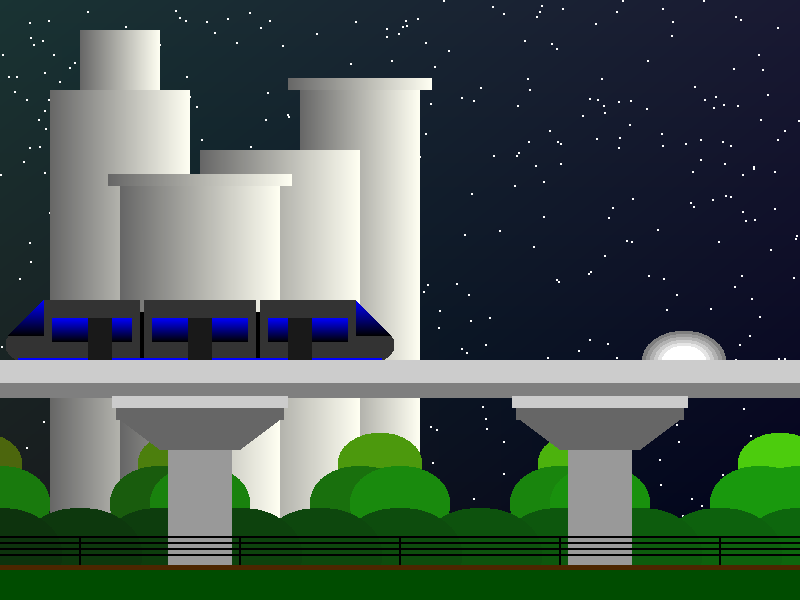

In [ ]:
# Let's render something!

import math
import random 
gl.glPointSize(5)
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

###################### The main values for transformation

v1 = np.array([[-1],
              [1],
              [1]])
v2 = np.array([[1],
              [1],
              [1]])
v3 = np.array([[1],
              [-1],
              [1]])
v4 = np.array([[-1],
              [-1],
              [1]])

environment=input("Is it day or night? (input Day/Night): ")

time=int(input("What's the Time? (input any integer from 5 to 12): "))


xpos= 500+time*30
ypos= (time*220)-1750

if environment=="Night" or environment=="night":
  ######################################### Night Sky Background

  gl.glBegin(gl.GL_QUADS)
  gl.glColor3f(0.1,0.2,0.2)
  gl.glVertex2f(v1[0][0],v1[1][0])
  gl.glColor3f(0.1,0.1,0.2)
  gl.glVertex2f(v2[0][0],v2[1][0])
  gl.glColor3f(0,0,0.1)
  gl.glVertex2f(v3[0][0],v3[1][0])
  gl.glColor3f(0.1,0.1,0.1)
  gl.glVertex2f(v4[0][0],v4[1][0])
  gl.glEnd()


  ########################################## Stars
  gl.glPointSize(2)
  gl.glColor3f(1,1,1)
  gl.glBegin(gl.GL_POINTS)
  for i in range(500):
    a=random.uniform(-1,1)
    b=random.uniform(-1,1)
    gl.glVertex2f(a,b)
  gl.glEnd()

  ########################################## Moon
  r=0.5
  g=0.5
  b=0.5
  rad=100
  for i in range(10):
    gl.glColor3f(r,g,b)
    MPC(rad,xpos,ypos)
    rad-=10
    r+=0.1
    g+=0.1
    b+=0.1


elif environment=="Day" or environment=="day":
  ##################################### Day Sky Background
  gl.glBegin(gl.GL_QUADS)
  gl.glColor3f(1,0.9,0.9)
  gl.glVertex2f(v1[0][0],v1[1][0])
  gl.glColor3f(1,0.9,0.9)
  gl.glVertex2f(v2[0][0],v2[1][0])
  gl.glColor3f(1,0.8,0.5)
  gl.glVertex2f(v3[0][0],v3[1][0])
  gl.glColor3f(1,0.8,0.5)
  gl.glVertex2f(v4[0][0],v4[1][0])
  gl.glEnd()

  ##################################### Sun
  r=1
  g=0.8
  b=0.8
  rad=100
  for i in range(10):
    gl.glColor3f(r,g,b)
    MPC(rad,xpos,ypos)
    rad-=10
    g-=0.1
    b-=0.1
else:
  print("Please for Day/Night enter only Day or Night, otherwise it's Dark a Night (^-^)")


###################################### Buildings
trsca = np.array([[0.15, 0, -0.1],
                 [0, 0.7, 0],
                 [0, 0, 1]])


v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glBegin(gl.GL_QUADS)
gl.glColor3f(0.4,0.4,0.4)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glColor3f(1,1,0.95)
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glColor3f(1,1,0.95)
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glColor3f(0.4,0.4,0.4)
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()

trsca = np.array([[0.18, 0, -0.1],
                 [0, 0.02, 0.72],
                 [0, 0, 1]])


v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glBegin(gl.GL_QUADS)
gl.glColor3f(0.4,0.4,0.4)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glColor3f(1,1,0.95)
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glColor3f(1,1,0.95)
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glColor3f(0.4,0.4,0.4)
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()


trsca = np.array([[0.2, 0, -.3],
                 [0, 0.7, -0.2],
                 [0, 0, 1]])


v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glBegin(gl.GL_QUADS)
gl.glColor3f(0.4,0.4,0.4)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glColor3f(1,1,0.95)
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glColor3f(1,1,0.95)
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glColor3f(0.4,0.4,0.4)
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()


trsca = np.array([[0.1, 0, -.7],
                 [0, -0.9, 0],
                 [0, 0, 1]])


v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glBegin(gl.GL_QUADS)
gl.glColor3f(0.4,0.4,0.4)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glColor3f(1,1,0.95)
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glColor3f(1,1,0.95)
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glColor3f(0.4,0.4,0.4)
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()

trsca = np.array([[0.175, 0, -.7],
                 [0, -0.72, -0.02],
                 [0, 0, 1]])


v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glBegin(gl.GL_QUADS)
gl.glColor3f(0.4,0.4,0.4)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glColor3f(1,1,0.95)
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glColor3f(1,1,0.95)
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glColor3f(0.4,0.4,0.4)
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()


trsca = np.array([[0.2, 0, -.5],
                 [0, 0.6, -0.2],
                 [0, 0, 1]])


v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glBegin(gl.GL_QUADS)
gl.glColor3f(0.4,0.4,0.4)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glColor3f(1,1,0.95)
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glColor3f(1,1,0.95)
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glColor3f(0.4,0.4,0.4)
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()

trsca = np.array([[0.23, 0, -.5],
                 [0, -0.02, 0.4],
                 [0, 0, 1]])

v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glBegin(gl.GL_QUADS)
gl.glColor3f(0.4,0.4,0.4)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glColor3f(1,1,0.95)
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glColor3f(1,1,0.95)
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glColor3f(0.4,0.4,0.4)
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()



################################################# Treee
xpos=950
r=0.3
g=0.8
b=0.05
for i in range(5):
  rad=100
  for i in range(10):
    gl.glColor3f(r,g,b)
    MPC(rad,xpos,-550)
    rad-=10
  xpos-=500
  g-=0.1

xpos=900
r=0.1
g=0.6
b=0.05
for i in range(5):
  rad=120
  for i in range(12):
    gl.glColor3f(r,g,b)
    MPC(rad,xpos,-680)
    rad-=10
  xpos-=500
  g-=0.08


xpos=1000
r=0.1
g=0.6
b=0.05
for i in range(5):
  rad=120
  for i in range(12):
    gl.glColor3f(r,g,b)
    MPC(rad,xpos,-680)
    rad-=10
  xpos-=500
  g-=0.03  

xpos=1000
r=0.05
g=0.4
b=0.05
for i in range(11):
  rad=150
  for i in range(15):
    gl.glColor3f(r,g,b)
    MPC(rad,xpos,-850)
    rad-=10
  xpos-=200
  g-=0.02


#######################################################3 Metro

mx=float(input('Input movement of metro rail -100 to +100: '))
mx=mx/100

trsca = np.array([[0.4, 0, mx],
             [0, 0.08, -0.12],
             [0, 0, 1]])

v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glColor3f(0,0,0)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()


gl.glColor3f(0.2,0.2,0.2)

trsca = np.array([[0.14, 0, mx],
             [0, 0.1, -0.1],
             [0, 0, 1]])

v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()

trsca = np.array([[0.12, 0, mx+0.27],
             [0, 0.1, -0.1],
             [0, 0, 1]])

v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()

trsca = np.array([[0.12, 0, mx-0.27],
             [0, 0.1, -0.1],
             [0, 0, 1]])

v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()

rad=50
xx=mx*1000
for i in range (10):
  MPC(rad,xx+430,-150)
  MPC(rad,xx-430,-150)
  rad-=10
  
gl.glBegin(gl.GL_TRIANGLES)
gl.glColor3f(0,0,0)
gl.glVertex2f(mx+.48,-0.12)
gl.glColor3f(0,0,0)
gl.glVertex2f(mx+.39,-0.12)
gl.glColor3f(0,0,1)
gl.glVertex2f(mx+.39,0)
gl.glEnd()


gl.glBegin(gl.GL_TRIANGLES)
gl.glColor3f(0,0,0)
gl.glVertex2f(mx-.48,-0.12)
gl.glColor3f(0,0,0)
gl.glVertex2f(mx-.39,-0.12)
gl.glColor3f(0,0,1)
gl.glVertex2f(mx-.39,0)
gl.glEnd()



##### Metro  windows, doors & design
gl.glColor3f(0,0,1)
MPL(mx-0.45,-0.2,mx+0.45,-0.2)

trsca = np.array([[0.12, 0, mx],
             [0, 0.04, -0.1],
             [0, 0, 1]])

v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)


gl.glBegin(gl.GL_QUADS)
gl.glColor3f(0,0,1)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glColor3f(0,0,1)
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glColor3f(0,0,0)
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glColor3f(0,0,0)
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()

trsca = np.array([[0.1, 0, mx+0.27],
             [0, 0.04, -0.1],
             [0, 0, 1]])

v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glBegin(gl.GL_QUADS)
gl.glColor3f(0,0,1)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glColor3f(0,0,1)
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glColor3f(0,0,0)
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glColor3f(0,0,0)
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()

trsca = np.array([[0.1, 0, mx-0.27],
             [0, 0.04, -0.1],
             [0, 0, 1]])

v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glBegin(gl.GL_QUADS)
gl.glColor3f(0,0,1)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glColor3f(0,0,1)
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glColor3f(0,0,0)
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glColor3f(0,0,0)
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()




gl.glColor3f(0.1,0.1,0.1)

trsca = np.array([[0.03, 0, mx],
             [0, 0.07, -0.13],
             [0, 0, 1]])

v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)


gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()

trsca = np.array([[0.03, 0, mx+0.25],
             [0, 0.07, -0.13],
             [0, 0, 1]])

v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()

trsca = np.array([[0.03, 0, mx-0.25],
             [0, 0.07, -0.13],
             [0, 0, 1]])

v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()





########################################## Bridge 

trsca = np.array([[1, 0, 0],
             [0, 0.05, -0.25],
             [0, 0, 1]])


v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glColor3f(0.8,0.8,0.8)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()


trsca = np.array([[1, 0, 0],
             [0, 0.025, -0.3],
             [0, 0, 1]])

v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glColor3f(0.5,0.5,0.5)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()


##### Pillar upper part
trsca = np.array([[0.22, 0, 0.5],
             [0, 0.02, -0.34],
             [0, 0, 1]])


v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glColor3f(0.8,0.8,0.8)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()

reflect = np.array([[-1, 0,0],
                   [0, 1, 0],
                   [0, 0, 1]])

v11 = np.matmul(reflect,v11)
v22 = np.matmul(reflect,v22)
v33 = np.matmul(reflect,v33)
v44 = np.matmul(reflect,v44)

gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()

trsca = np.array([[0.21, 0, 0.5],
             [0, 0.02, -0.38],
             [0, 0, 1]])


v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glColor3f(0.4,0.4,0.4)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()

reflect = np.array([[-1, 0, 0],
                   [0, 1, 0],
                   [0, 0, 1]])

v11 = np.matmul(reflect,v11)
v22 = np.matmul(reflect,v22)
v33 = np.matmul(reflect,v33)
v44 = np.matmul(reflect,v44)

gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()




##### Pillar Middle part

gl.glColor3f(0.4,0.4,0.4)

trsca = np.array([[0.1, 0, 0.45],
             [0, 0.05, -0.45],
             [0, 0, 1]])

sh = np.array([[1, -.5, 0],
             [0, 1, 0],
             [0, 0, 1]])

shtrsca = np.matmul(trsca,sh)

v11 = np.matmul(shtrsca,v1)
v22 = np.matmul(shtrsca,v2)
v33 = np.matmul(shtrsca,v3)
v44 = np.matmul(shtrsca,v4)


gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()
reflect = np.array([[-1, 0, 0],
                   [0, 1, 0],
                   [0, 0, 1]])

v11 = np.matmul(reflect,v11)
v22 = np.matmul(reflect,v22)
v33 = np.matmul(reflect,v33)
v44 = np.matmul(reflect,v44)

gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()



trsca = np.array([[0.1, 0, 0.55],
             [0, 0.05, -0.45],
             [0, 0, 1]])

sh = np.array([[1, .5, 0],
             [0, 1, 0],
             [0, 0, 1]])

shtrsca = np.matmul(trsca,sh)

v11 = np.matmul(shtrsca,v1)
v22 = np.matmul(shtrsca,v2)
v33 = np.matmul(shtrsca,v3)
v44 = np.matmul(shtrsca,v4)

gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()
reflect = np.array([[-1, 0, 0],
                   [0, 1, 0],
                   [0, 0, 1]])

v11 = np.matmul(reflect,v11)
v22 = np.matmul(reflect,v22)
v33 = np.matmul(reflect,v33)
v44 = np.matmul(reflect,v44)

gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()

######### Pillar
trsca = np.array([[0.08, 0, 0.5],
             [0, 0.2, -0.7],
             [0, 0, 1]])


v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glColor3f(0.6,0.6,0.6)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()
reflect = np.array([[-1, 0, 0],
                   [0, 1, 0],
                   [0, 0, 1]])

v11 = np.matmul(reflect,v11)
v22 = np.matmul(reflect,v22)
v33 = np.matmul(reflect,v33)
v44 = np.matmul(reflect,v44)

gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()

############################################### Fence & grass
gl.glColor3f(0,0,0)
gl.glPointSize(2)
MPL(-1,-0.85,1,-0.85)
MPL(-1,-0.83,1,-0.83)
MPL(-1,-0.81,1,-0.81)
MPL(-1,-0.79,1,-0.79)

MPL(-0.8,-0.9,-0.8,-0.79)
MPL(-0.4,-0.9,-0.4,-0.79)
MPL(-0.0,-0.9,-0.0,-0.79)
MPL(0.4,-0.9,0.4,-0.79)
MPL(0.8,-0.9,0.8,-0.79)

gl.glColor3f(0.3,0.15,0)
gl.glPointSize(10)
MPL(-1,-0.9,1,-0.9)

trsca = np.array([[1, 0, 0],
             [0, 0.05, -0.95],
             [0, 0, 1]])


v11 = np.matmul(trsca,v1)
v22 = np.matmul(trsca,v2)
v33 = np.matmul(trsca,v3)
v44 = np.matmul(trsca,v4)

gl.glColor3f(0,0.3,0)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])
gl.glVertex2f(v22[0][0],v22[1][0])
gl.glVertex2f(v33[0][0],v33[1][0])
gl.glVertex2f(v44[0][0],v44[1][0])
gl.glEnd()


from IPython.display import display
from PIL import Image



img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))